In [188]:
import pandas as pd
import numpy as np
## Import the housing data as a data frame and ensure that the data is loaded properly
pricesdf = pd.read_csv('/Users/madisonchristiansen/Desktop/train.csv')   
pricesdf.to_csv('train.csv', index=False)

pricesdf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [189]:
## Drop the "Id" column 
pricesdf = pricesdf.drop(columns=['Id'])
pricesdf.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [190]:
## Drop columns that are missing more than 40% of their values.
null = pricesdf.isnull().sum() / len(pricesdf)
missing_features = null[null > 0.40].index
pricesdf.drop(missing_features, axis=1, inplace=True)
pricesdf.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [191]:
pricesdf.select_dtypes(include=np.number).columns.tolist() # numeric columns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [192]:
##  fill in any missing data with the median value
pricesdf[['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']] = pricesdf[['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']].fillna(pricesdf[['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']].median())

In [193]:
missingcat = [var for var in pricesdf.columns if pricesdf[var].isnull().mean()>0] # categorial columns

In [194]:
pricesdf.select_dtypes(include=['object']).columns.tolist()

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [195]:
## fill in any missing data with the most common value (mode)
pricesdf['MasVnrType'].fillna(pricesdf['MasVnrType'].value_counts().index[0], inplace=True)
pricesdf['BsmtQual'].fillna(pricesdf['BsmtQual'].value_counts().index[0], inplace=True)
pricesdf['BsmtCond'].fillna(pricesdf['BsmtCond'].value_counts().index[0], inplace=True)
pricesdf['BsmtExposure'].fillna(pricesdf['BsmtExposure'].value_counts().index[0], inplace=True)
pricesdf['BsmtFinType1'].fillna(pricesdf['BsmtFinType1'].value_counts().index[0], inplace=True)
pricesdf['BsmtFinType2'].fillna(pricesdf['BsmtFinType2'].value_counts().index[0], inplace=True)
pricesdf['Electrical'].fillna(pricesdf['Electrical'].value_counts().index[0], inplace=True)
pricesdf['GarageType'].fillna(pricesdf['GarageType'].value_counts().index[0], inplace=True)
pricesdf['GarageFinish'].fillna(pricesdf['GarageFinish'].value_counts().index[0], inplace=True)
pricesdf['GarageQual'].fillna(pricesdf['GarageQual'].value_counts().index[0], inplace=True)
pricesdf['GarageCond'].fillna(pricesdf['GarageCond'].value_counts().index[0], inplace=True)

In [196]:
## Convert the categorical columns to dummy variables

cleandf = pd.get_dummies(pricesdf,
                     columns = ['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition'])
  
display(cleandf)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


In [197]:
## Split the data into a training and test set, where the SalePrice column is the target
import sklearn 
from sklearn.model_selection import train_test_split 
X = cleandf.drop('SalePrice', axis='columns')
y = cleandf.SalePrice ##the target

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [198]:
from sklearn.linear_model import LinearRegression # package
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
print('The Intercept:', str(lin_reg.intercept_))

# R2 calculation 
print("Value of R-squared:", lin_reg.score(X_train,y_train))

# rmse
yp = lin_reg.predict(X)

rmse = np.sqrt(np.mean(np.square(y-yp)))
print("Value of RMSE:", rmse)


The Intercept: -1833814.4986194365
Value of R-squared: 0.9405632805953688
Value of RMSE: 22986.420211171506


In [199]:
## Fit and transform the training features with a PCA so that 90% of the variance is retained
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)


In [200]:
pca = PCA(n_components=0.9, whiten=True) # 90% of the variance

In [201]:
train_pca = pca.fit_transform(X_train_std) # fit train

In [202]:
print("Original number of features:", X_train_std.shape[1])
print("Reduced number of features:", train_pca.shape[1])

Original number of features: 270
Reduced number of features: 138


In [204]:
# Transform but DO NOT fit the test features with the same PCA
X_test_std = sc.transform(X_test)

test_features_pca=pca.transform(X_test_std)
test_features_pca.shape

(365, 138)

In [206]:
## PCA transformed data
lin_reg = LinearRegression()
lin_reg.fit(train_pca,y_train)

y_pred_PCA = lin_reg.predict(test_features_pca)

In [218]:
# R2 calculation 
print("Value of R-squared:", lin_reg.score(train_pca,y_train))

# rmse
rmse = np.sqrt(np.mean(np.square(y_test, y_pred_PCA)))
print("Value of RMSE:", rmse)


Value of R-squared: 0.9034695853296008
Value of RMSE: 190462.64188755312


In [59]:
## min-max scaler 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(X_train))

MinMaxScaler()


In [60]:
print(scaler.data_max_)

[1.90000e+02 3.13000e+02 2.15245e+05 1.00000e+01 9.00000e+00 2.01000e+03
 2.01000e+03 1.37800e+03 5.64400e+03 1.47400e+03 2.33600e+03 6.11000e+03
 4.69200e+03 2.06500e+03 5.72000e+02 5.64200e+03 3.00000e+00 1.00000e+00
 3.00000e+00 2.00000e+00 8.00000e+00 3.00000e+00 1.40000e+01 3.00000e+00
 2.01000e+03 4.00000e+00 1.41800e+03 8.57000e+02 5.02000e+02 3.86000e+02
 5.08000e+02 4.40000e+02 7.38000e+02 8.30000e+03 1.20000e+01 2.01000e+03
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.

In [61]:
print(scaler.transform(X_train))

[[0.35294118 0.25684932 0.04662413 ... 0.         1.         0.        ]
 [0.         0.19178082 0.0407114  ... 0.         1.         0.        ]
 [0.         0.15753425 0.04373087 ... 0.         0.         1.        ]
 ...
 [0.         0.13356164 0.02675454 ... 0.         1.         0.        ]
 [0.17647059 0.10616438 0.02309005 ... 0.         1.         0.        ]
 [0.         0.16438356 0.03692538 ... 0.         1.         0.        ]]


In [62]:
## min-max scaled features in your training set that have a variance above 0.1
from sklearn.feature_selection import VarianceThreshold
thresholder = VarianceThreshold(threshold=.5)

features_high_variance = thresholder.fit_transform(X_train)

In [63]:
features_high_variance[0:3] ## high variance data 

array([[8.0000e+01, 9.6000e+01, 1.1275e+04, 7.0000e+00, 7.0000e+00,
        1.9670e+03, 2.0070e+03, 3.0000e+02, 0.0000e+00, 0.0000e+00,
        7.1000e+02, 7.1000e+02, 1.8980e+03, 1.0800e+03, 0.0000e+00,
        2.9780e+03, 5.0000e+00, 1.1000e+01, 1.9610e+03, 2.0000e+00,
        5.6400e+02, 2.4000e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00, 2.0100e+03],
       [2.0000e+01, 7.7000e+01, 1.0010e+04, 5.0000e+00, 5.0000e+00,
        1.9740e+03, 1.9750e+03, 0.0000e+00, 1.0710e+03, 1.2300e+02,
        1.9500e+02, 1.3890e+03, 1.3890e+03, 0.0000e+00, 0.0000e+00,
        1.3890e+03, 2.0000e+00, 6.0000e+00, 1.9750e+03, 2.0000e+00,
        4.1800e+02, 2.4000e+02, 3.8000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00, 2.0060e+03],
       [2.0000e+01, 6.7000e+01, 1.0656e+04, 8.0000e+00, 5.0000e+00,
        2.0060e+03, 2.0070e+03, 2.7400e+02, 0.0000e+00, 0.0000e+00,
        1.6380e+03, 1.6380e+03, 1.6460e+03, 0.

In [220]:
### Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12
test_scaled_feature=scaler.transform(X_test)
test_scaled_feature

array([[0.        , 0.16438356, 0.07049008, ..., 0.        , 1.        ,
        0.        ],
       [0.29411765, 0.13356164, 0.04440394, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.15068493, 0.0334198 , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.18150685, 0.03380308, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.17123288, 0.03764052, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.13356164, 0.02757718, ..., 0.        , 1.        ,
        0.        ]])

In [222]:
## high variance feature matrix
test_features_high_variance = thresholder.transform(test_scaled_feature) # X_train data
test_features_high_variance[0:3]

/Users/madisonchristiansen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but VarianceThreshold was fitted with feature names
  warnings.warn(


array([[0.        , 0.16438356, 0.07049008, 0.55555556, 0.5       ,
        0.70289855, 0.31666667, 0.22641509, 0.19666903, 0.        ,
        0.31421233, 0.30180033, 0.34648922, 0.        , 0.        ,
        0.28447626, 0.375     , 0.41666667, 0.62727273, 0.5       ,
        0.38081805, 0.        , 0.14541833, 0.55958549, 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.29411765, 0.13356164, 0.04440394, 0.66666667, 0.875     ,
        0.13043478, 0.8       , 0.        , 0.        , 0.        ,
        0.30736301, 0.11751227, 0.28499312, 0.47360775, 0.        ,
        0.41823662, 0.375     , 0.5       , 0.87272727, 0.5       ,
        0.49647391, 0.        , 0.09561753, 0.37046632, 0.        ,
        0.        , 0.        , 0.        , 0.54545455, 0.25      ],
       [0.        , 0.15068493, 0.0334198 , 0.44444444, 0.625     ,
        0.69565217, 0.3       , 0.        , 0.13731396, 0.        ,
        0.1202911 , 0.17283142, 0.16567233, 0.

In [225]:
## Repeat step 7 with the high variance data.
## training with feature high variance
lin_reg.fit(features_high_variance, y_train)

y_pred_MinMax = lin_reg.predict(test_features_high_variance)

In [230]:
from sklearn.metrics import r2_score


print("RMSE:", np.mean(np.square(y_test, y_pred_MinMax)))
print("R2:", r2_score(y_test, y_pred_MinMax))

RMSE: 36276017954.7863
R2: -482726282726.5514


## Summarize
### The r2 value is between 0 and 1 and this is a measure of how well the regression predicts real values. The PCA modle gives the ebst results.

In [232]:
# Part 2

## Import the data as a data frame
shrooms = pd.read_csv('/Users/madisonchristiansen/Desktop/mushrooms.csv')   
shrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [234]:
shrooms['Class_Code'] = shrooms['class'].replace(to_replace=["p","e"], value=[1,0])
shrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Class_Code
0,p,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,1
1,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,0
2,e,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,0
3,p,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,1
4,e,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,0


In [235]:
shrooms.columns.tolist() # columns

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat',
 'Class_Code']

In [236]:
## Convert the categorical features to dummy variables
shroomsdf = pd.get_dummies(shrooms, columns = ['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat'])
  
display(shroomsdf)

,Class_Code,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [237]:
## Split the data into a training and test set.
X_mush = shroomsdf.drop(['Class_Code', 'class_e', 'class_p'], axis = 1) 
y_mush = shroomsdf['Class_Code'] ## target

##split the data into training and test sets (80% Training/20% Test)
X_train_mush, X_test_mush, y_train_mush, y_test_mush = train_test_split(X_mush, y_mush, test_size = 0.2, random_state=1)


In [239]:
##  Fit a decision tree classifier on the training set
clf_model = DecisionTreeClassifier() 

clf_model.fit(X_train_mush,y_train_mush)
y_pred_mush = clf_model.predict(X_test_mush)

In [244]:
## accuracy
print("Accuracy: ", str(round(metrics.accuracy_score(y_test_mush, y_pred_mush) * 100)), '%')

## confusion matrix 
print('Confusion Matrix:')
print(pd.DataFrame(metrics.confusion_matrix(y_test_mush, y_pred_mush)).set_axis(['Edible', 'Poisonous'], axis=1).rename({0 : 'Edible', 1 : 'Poisonous'}, axis=0))

Accuracy:  100 %
Confusion Matrix:
           Edible  Poisonous
Edible        820          0
Poisonous       0        805


In [249]:
## visualization 
from sklearn import tree

text_representation = tree.export_text(clf_model)
print(text_representation)

|--- feature_27 <= 0.50
|   |--- feature_53 <= 0.50
|   |   |--- feature_63 <= 0.50
|   |   |   |--- feature_34 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_34 >  0.50
|   |   |   |   |--- feature_23 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_23 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_63 >  0.50
|   |   |   |--- class: 0
|   |--- feature_53 >  0.50
|   |   |--- feature_65 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_65 >  0.50
|   |   |   |--- class: 1
|--- feature_27 >  0.50
|   |--- feature_100 <= 0.50
|   |   |--- feature_63 <= 0.50
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |--- feature_35 <= 0.50
|   |   |   |   |   |   |--- feature_21 <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_21 >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_35 >  0.50
|   |   |   |   |   |   |--- class: 0

In [248]:
from sklearn.feature_selection import chi2, f_classif

features = X_train_mush
target = y_train_mush

features = features.astype(int)
chi2_selector=SelectKBest(chi2, k=5) # 5 features w/ highest chi2
features_kbest = chi2_selector.fit_transform(features, target)

print ("Original number of features:", features.shape[1])
print ("Reduced number of features:", features_kbest.shape[1])

Original number of features: 117
Reduced number of features: 5


In [256]:
## five features in step 7 - column to keep 
cols = chi2_selector.get_support(indices=True)
features_df_new = features.iloc[:,cols]
features_df_new.head()

,odor_f,odor_n,gill-color_b,stalk-surface-above-ring_k,stalk-surface-below-ring_k
1610,0,1,0,0,0
1939,0,1,0,0,0
5573,0,0,1,1,1
7076,0,0,1,1,0
2000,0,1,0,0,0


Model Accuracy: 89.6%
Model Accuracy:  89.60000000000001 %


/Users/madisonchristiansen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


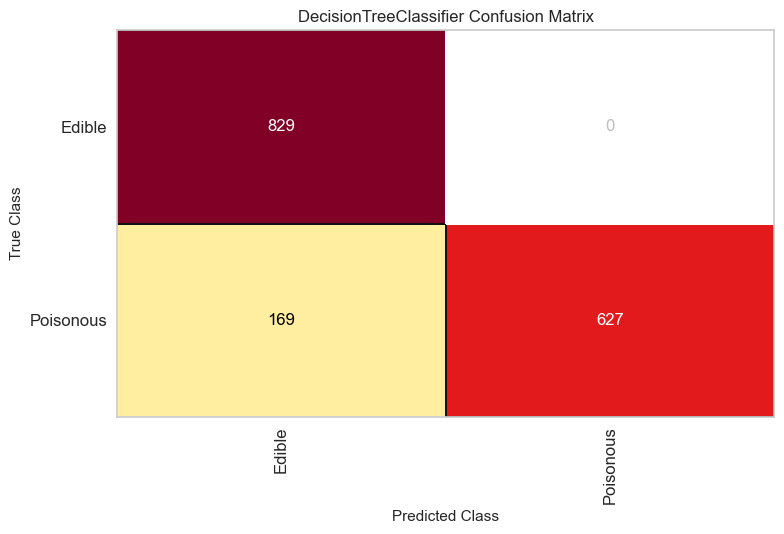

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [264]:
## repeat step 4&5
X_mush_chi = shroomsdf[['odor_f', 'odor_n', 'stalk-surface-below-ring_k', 'gill-color_b', 'stalk-surface-above-ring_k']]
y_mush_chi = shroomsdf['Class_Code']
X_train_mush_chi, X_test_mush_chi, y_train_mush_chi, y_test_mush_chi = train_test_split(X_mush_chi, y_mush_chi, test_size = 0.2)

## Decision Tree Classifier
clf_model_5 = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model_5.fit(X_train_mush_chi,y_train_mush_chi)

## creates the confusion matrix and gets the accuracy
mod_acc_chi = 100*cm.score(X_test_mush_chi, y_test_mush_chi)
print('Model Accuracy: ', round(mod_acc_chi,2), '%', sep = '')


## confusion matrix w/ yellowbrick - 
##I couldnt get the sklearn way to work (error: 'Classification metrics can't handle a mix of multilabel-indicator and binary targets' )
from yellowbrick.classifier import ConfusionMatrix

label_encoder = {0: 'Edible', 1: 'Poisonous'}
cm= ConfusionMatrix(clf_model_5, encoder = label_encoder,  percent=False)

cm.fit(X_test_mush_chi, y_test_mush_chi)

mod_acc_chi = 100*cm.score(X_test_mush_chi, y_test_mush_chi)
print('Model Accuracy: ',mod_acc_chi, '%')

cm.show()


### Summarize
#### The first Decision Tree Classifier was 100% accurate. When reducung to the 5 best features the accuracy went down to 89.6%. You can still get good accuracy with the reduction in features. 